In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

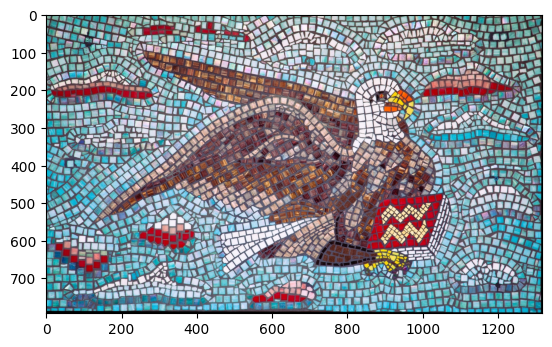

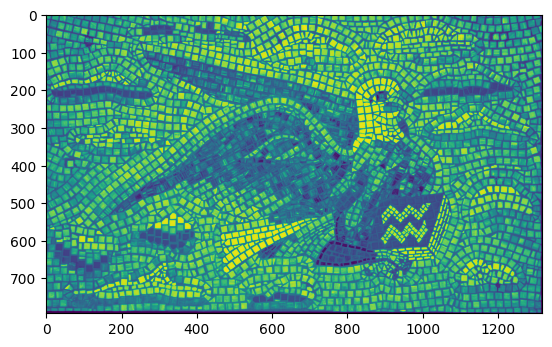

AttributeError: module 'cv2' has no attribute 'ximgproc'

In [8]:
img = cv2.imread('FranklinMascot.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
plt.show()

thresh = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

num_segments = 1000
slic = cv2.ximgproc.createSuperpixelSLIC(thresh, algorithm=cv2.ximgproc.SLIC, region_size=10, ruler=10.0)
slic.iterate(num_iterations=10)
label = slic.getLabels()

plt.imshow(label)
plt.show()
